In [1]:
import numpy as np
import scipy.stats as sps
import math
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Сгенерируем <b>M = 100</b> выборок размера <b>N = 1000</b> из равномерного распределения на отрезке $[0,\theta]$ для каждого $\theta_1=1, \theta_2 = 5, \theta_3 =10$.

In [2]:
M = 100
N = 1000
t1 = 1
t2 = 5
t3 = 10

In [3]:
samples1 = np.array([sps.uniform.rvs(size=N, loc = 0, scale = t1) for i in range(M)]) #M выборок размера N
samples2 = np.array([sps.uniform.rvs(size=N, loc = 0, scale = t2) for i in range(M)]) #M выборок размера N
samples3 = np.array([sps.uniform.rvs(size=N, loc = 0, scale = t3) for i in range(M)]) #M выборок размера N

Подсчитаем следующие оценки для кажой выбороки $X_1,...,X_n$ для всех $n\leq 1000$ 

оценка 1 - $2\overline{X};$  

оценка 2 - $(n + 1)X_{(1)};$  

оценка 3 - $X_{(1)} + X_{(n)};$

оценка 4 - $\frac{n+1}{n}X_{(n)};$

Следующая функция вычисляет нужные оценки для выборки и возвращает 4 массива с оценками.  

In [4]:
def evaluate(sample):
    means = sample.cumsum() / np.arange(1, N + 1)
    
    mins = np.array([sample[0]])
    for i in range(1, N): 
        mins = np.append(mins, sample[i] if sample[i] < mins[- 1] else mins[- 1])

    maxs = np.array([sample[0]])
    for i in range(1, N): 
        maxs = np.append(maxs, sample[i] if sample[i] > maxs[- 1] else maxs[- 1])
    
    ev1 = np.array([2 * means[n] for n in range(N)])
    ev2 = np.array([(n + 2) * mins[n] for n in range(N)])
    ev3 = np.array([mins[n] + maxs[n] for n in range(N)])
    ev4 = np.array([(n + 2) * maxs[n] / (n + 1) for n in range(N)])
    return np.array([ev1, ev2, ev3, ev4])

Оценки для каждой из выборок:

In [5]:
evaluations_t1 = np.array(map(evaluate, samples1)) #M массивов с 5 N-оценками
evaluations_t2 = np.array(map(evaluate, samples2)) 
evaluations_t3 = np.array(map(evaluate, samples3)) 

Подсчитаем для каждой оценки квадратичную функцию потерь.

In [6]:
loss_f_t1 = (evaluations_t1 - t1) ** 2
loss_f_t2 = (evaluations_t2 - t2) ** 2
loss_f_t3 = (evaluations_t3 - t3) ** 2

Среднее для функций потреть для каждого $n$:

In [7]:
loss_all = (loss_f_t1.sum(axis=0) + loss_f_t2.sum(axis=0) + loss_f_t3.sum(axis=0)) / 3

Для каждой оценки построим график зависимости функции потерь $(\hat{\theta} - \theta)^2$ от n.

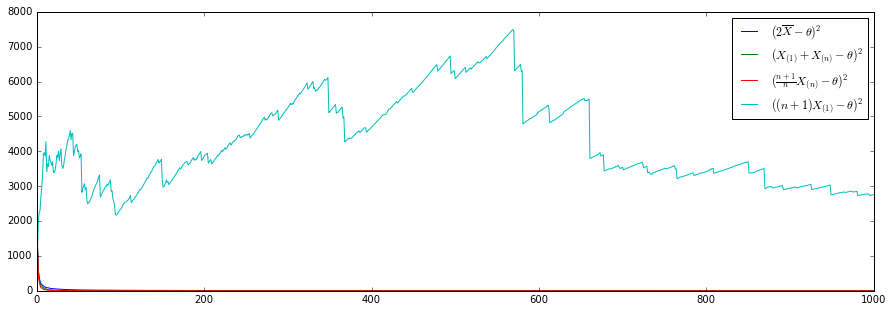

In [10]:
figure(figsize=(15,5))
plot(np.arange(1, N + 1), loss_all[0], label='$(2\overline{X}-\\theta)^2$')
plot(np.arange(1, N + 1), loss_all[2], label='$(X_{(1)} + X_{(n)} - \\theta)^2$')
plot(np.arange(1, N + 1), loss_all[3], label='$(\\frac{n+1}{n}X_{(n)}-\\theta)^2$')
plot(np.arange(1, N + 1), loss_all[1], label='$((n + 1)X_{(1)}-\\theta)^2$')
plt.legend()
plt.show()

График функций потерь для оценок (1), (3), (4):

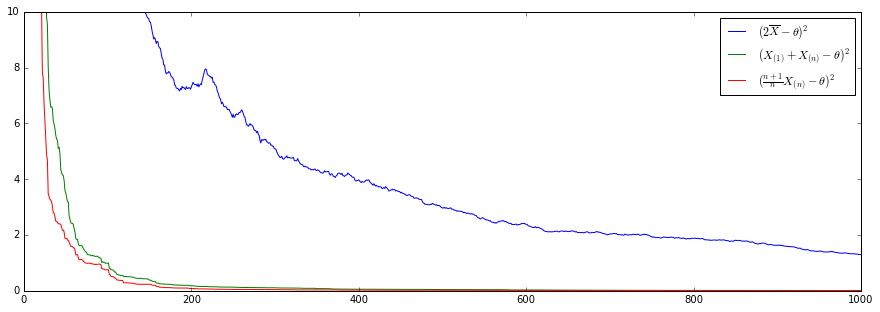

In [11]:
figure(figsize=(15,5))
plot(np.arange(1, N + 1), loss_all[0], label='$(2\overline{X}-\\theta)^2$')
plot(np.arange(1, N + 1), loss_all[2], label='$(X_{(1)} + X_{(n)} - \\theta)^2$')
plot(np.arange(1, N + 1), loss_all[3], label='$(\\frac{n+1}{n}X_{(n)}-\\theta)^2$')
plt.ylim(0,10)
plt.legend()
plt.show()

Из графика видим, что оценки (3), (4) лучшие в равномерном подходе среди четырех рассматриваемых оценок. 